In [280]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import warnings
from pprint import PrettyPrinter

warnings.filterwarnings('ignore')

In [28]:
df1 = pd.read_csv('test.csv')
df2 = pd.read_csv('train.csv')

df1.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [29]:
df2.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [30]:
df = pd.concat([df1, df2])

In [31]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [32]:
df = df.drop('Unnamed: 0', axis = 1)


In [33]:
duplicated = df.duplicated()
number_duplicated = duplicated.sum()

print(number_duplicated)


0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     129880 no

In [36]:
df.rename(columns={column: column.lower().replace(" ", "_").replace("/", "_").replace("-", "_") for column in df.columns}, inplace=True)
df.rename(columns={"checkin_service": "check_in_service"}, inplace=True)

In [38]:
df['arrival_delay_in_minutes'].value_counts()

arrival_delay_in_minutes
0.0      72753
1.0       2747
2.0       2587
3.0       2442
4.0       2373
         ...  
436.0        1
454.0        1
315.0        1
418.0        1
369.0        1
Name: count, Length: 472, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   gender                             129880 non-null  object 
 2   customer_type                      129880 non-null  object 
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  object 
 5   class                              129880 non-null  object 
 6   flight_distance                    129880 non-null  int64  
 7   inflight_wifi_service              129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   ease_of_online_booking             129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  food_and_drink                     129880 no

In [41]:
df.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,check_in_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [90]:
# Checking if there is any NaN value

df.isna().sum()[df.isna().sum() > 0]

arrival_delay_in_minutes    393
dtype: int64

## Exploratory Data Analysis

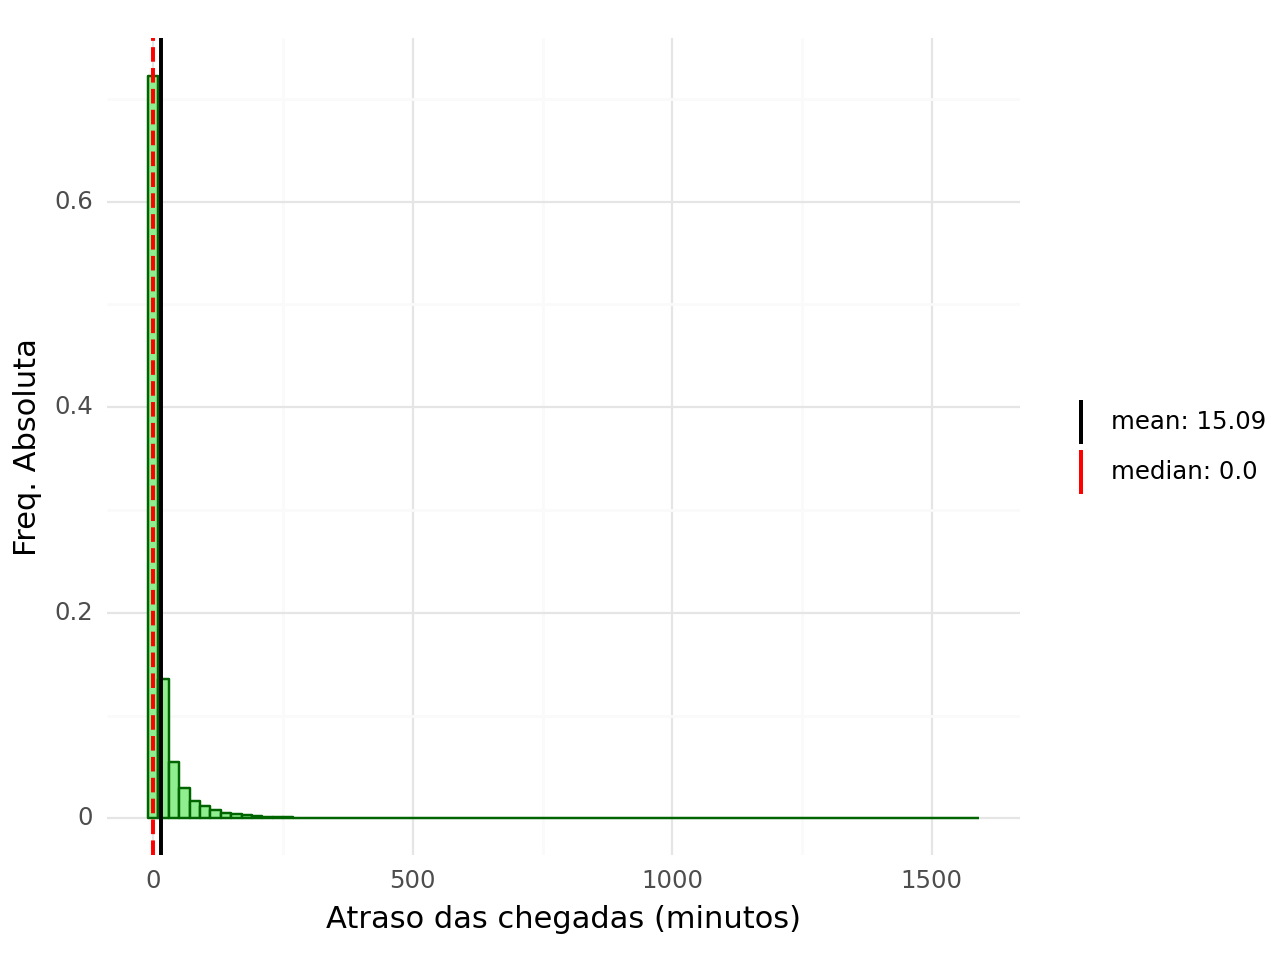

In [159]:
g=(
    ggplot()
    +geom_histogram(
        data=df,
        mapping=aes(x='arrival_delay_in_minutes', y=after_stat('count/np.sum(count)')),
        binwidth=20,
        color='darkgreen',
        fill='lightgreen'
    )
    +theme_minimal()
    +labs(
        x='Atraso das chegadas (minutos)',
        y='Freq. Absoluta'
    )
    +geom_vline(data=pd.DataFrame({'mean':np.mean(df.arrival_delay_in_minutes.dropna()), 'median':np.median(df.arrival_delay_in_minutes.dropna())}, index=range(2)), 
                mapping=aes(xintercept='median', color='factor(median)'), linetype='dashed', size=.8)
    +geom_vline(data=pd.DataFrame({'mean':np.mean(df.arrival_delay_in_minutes.dropna()), 'median':np.median(df.arrival_delay_in_minutes.dropna())}, index=range(2)), 
                mapping=aes(xintercept='mean', color='factor(mean)'), linetype='solid', size=.8)
    +scale_color_manual(values={np.median(df.arrival_delay_in_minutes.dropna()): 'red', np.mean(df.arrival_delay_in_minutes.dropna()): 'black'}, 
                        labels=[f'mean: {round(np.mean(df.arrival_delay_in_minutes.dropna()), 2)}', f'median: {np.median(df.arrival_delay_in_minutes.dropna())}'])
    +theme(legend_title=element_blank())
)
print(g)


No gráfico acima, vemos forte assimetria à direita. Posteriormente iremos substituir os valores NaN da *feature* `arrival_delay_in_minutes` pela mediana.

In [187]:
categoricos = df[list(df.select_dtypes('object').columns)[:-1]]
categoricos.head(3)

,gender,customer_type,type_of_travel,class
0,Female,Loyal Customer,Business travel,Eco
1,Female,Loyal Customer,Business travel,Business
2,Male,disloyal Customer,Business travel,Eco


In [199]:
def plot_count_bar(df, x_bar:str, rel_freq:bool, labels:dict):
    g = (
    ggplot(data=df)
    +geom_bar(
        aes(x=x_bar, 
            y='..count../sum(..count..)*100' if rel_freq == True else '..count..', 
            color=x_bar, 
            fill=x_bar)
    )
    +labs(**labels)
    +theme(
        legend_title=element_blank()
    )
    +theme_minimal()
    +theme(
        legend_title=element_blank()
    )
)
    print(g)

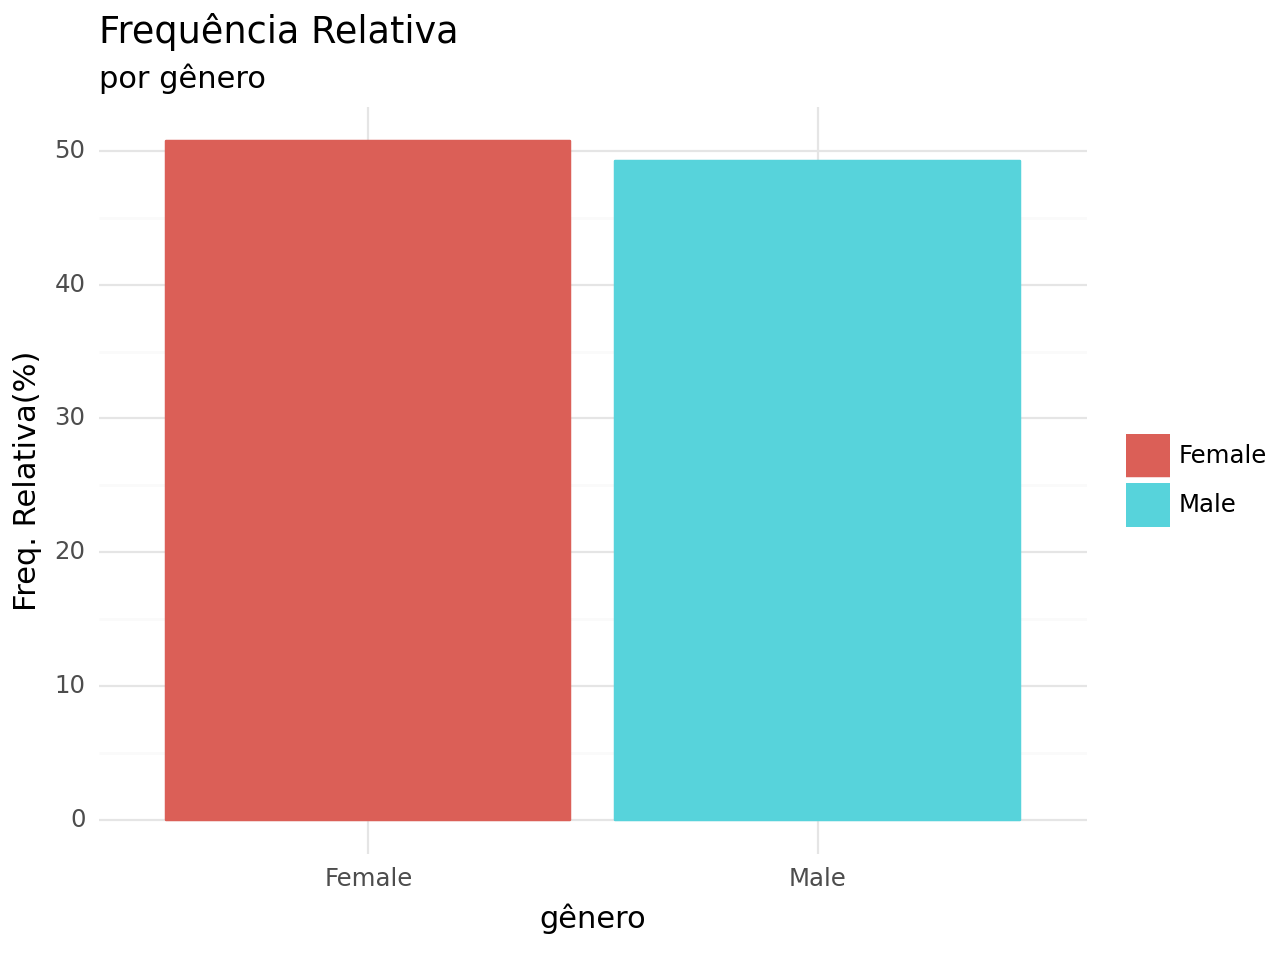

In [203]:
plot_count_bar(
    df,
    x_bar='gender',
    rel_freq=True,
    labels={'x':'gênero', 
            'y':'Freq. Relativa(%)', 
            'title': 'Frequência Relativa',
            'subtitle': 'por gênero'}
)

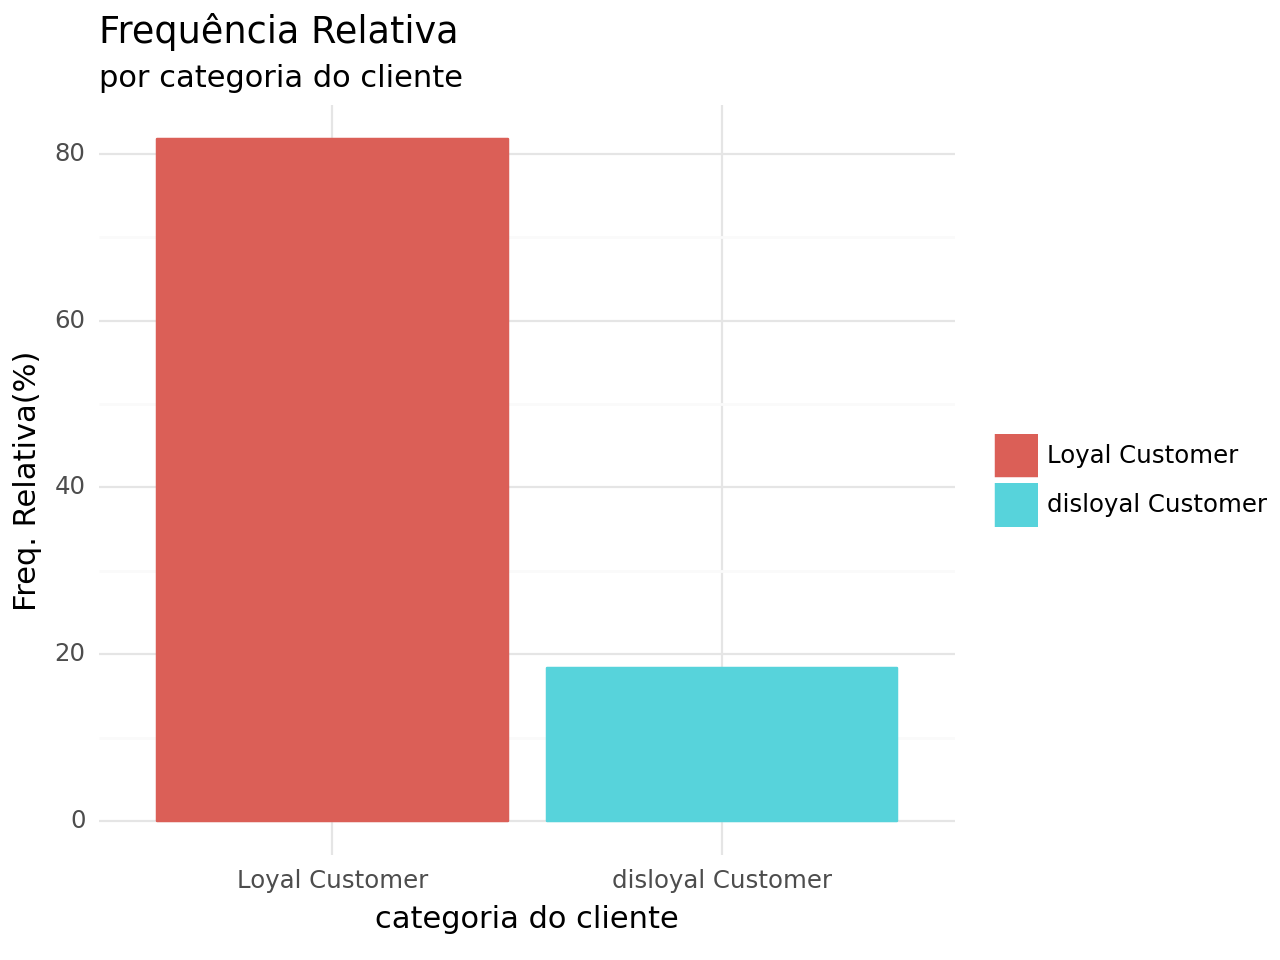

In [205]:
plot_count_bar(
    df,
    x_bar='customer_type',
    rel_freq=True,
    labels={
        'x': 'categoria do cliente',
        'y': 'Freq. Relativa(%)',
        'title': 'Frequência Relativa',
        'subtitle': 'por categoria do cliente'
    }
)

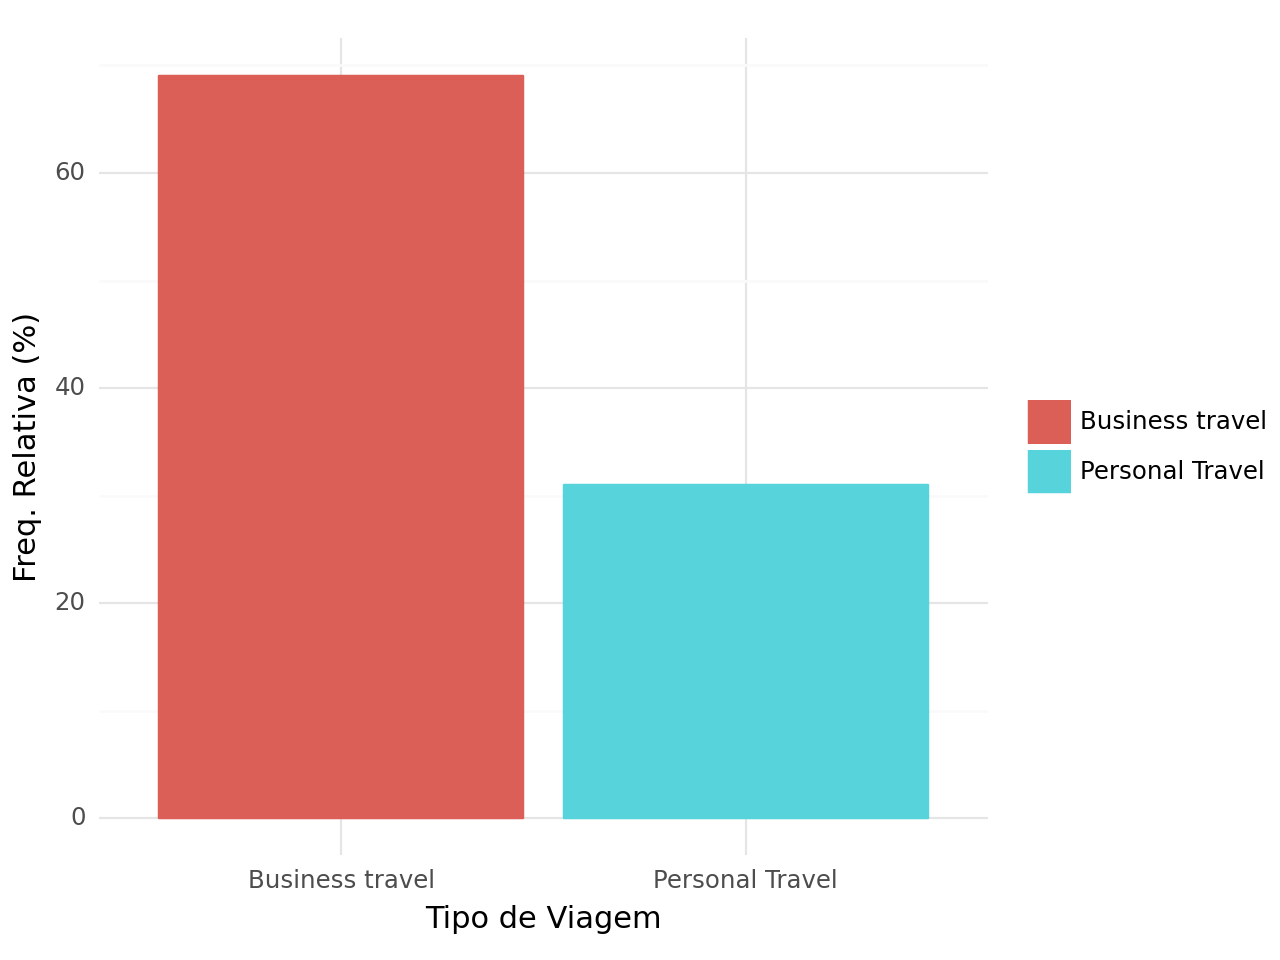

In [206]:
plot_count_bar(
    df,
    x_bar='type_of_travel',
    rel_freq=True,
    labels={
        'x': 'Tipo de Viagem',
        'y': 'Freq. Relativa (%)'
    }
)

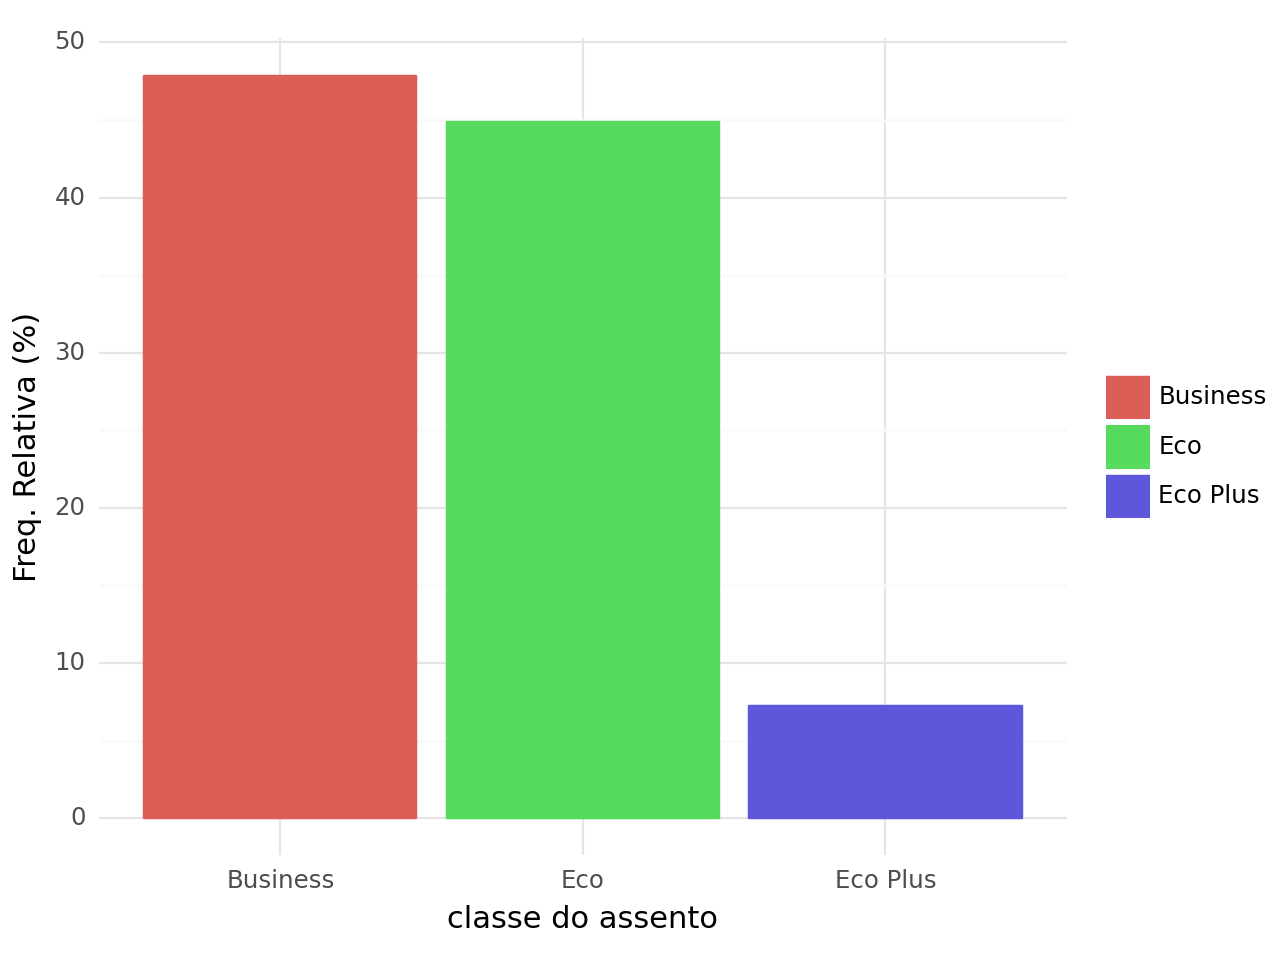

In [207]:
plot_count_bar(
    df,
    x_bar='class',
    rel_freq=True,
    labels={
        'x':'classe do assento',
        'y': 'Freq. Relativa (%)'
    }
)

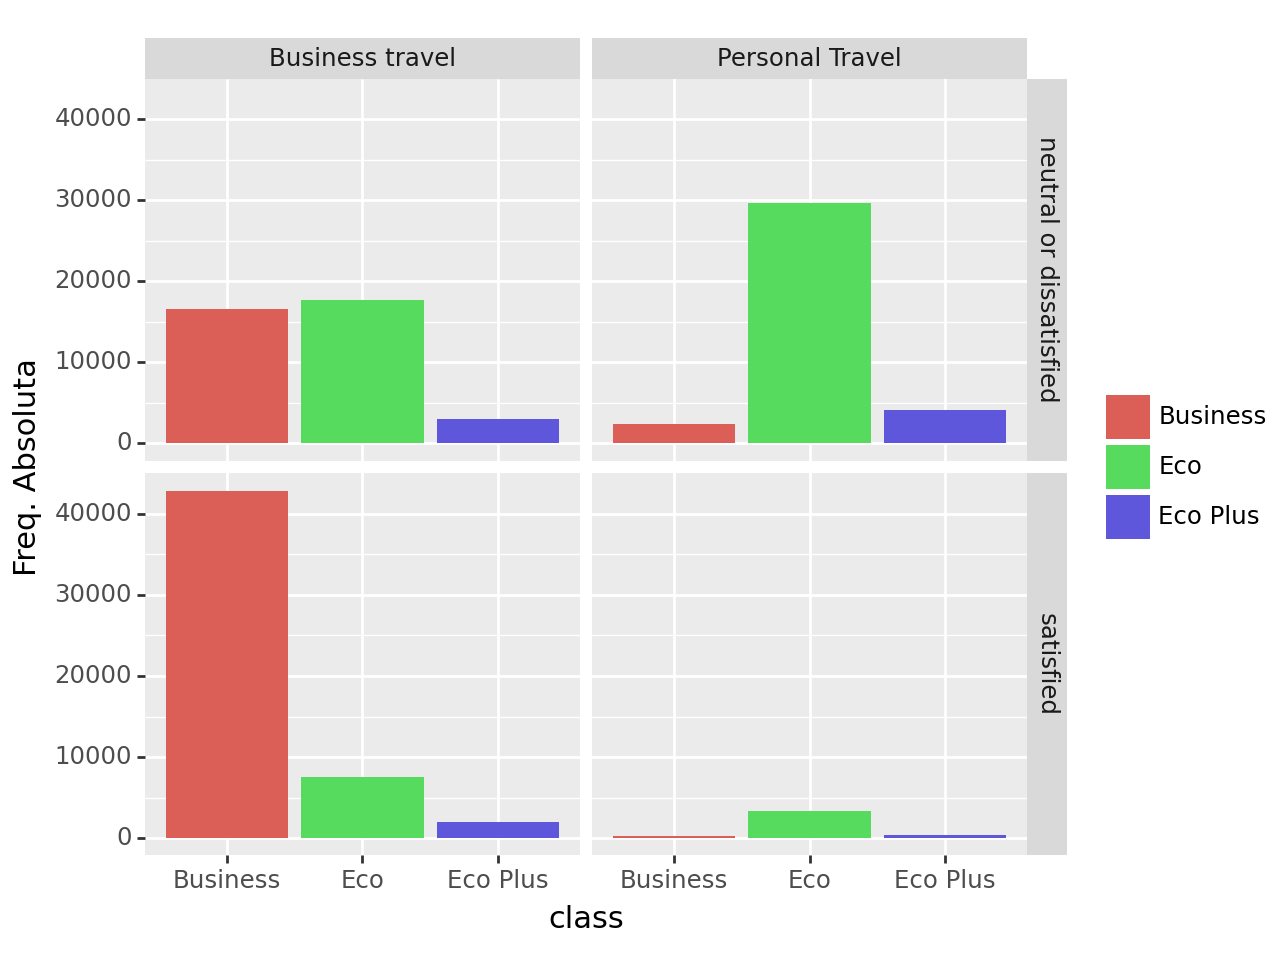

In [216]:
g=(
    ggplot(data=df)
    +geom_bar(
        aes(x='class',
        y='..count..',
        fill='class'
        )
    )
    +facet_grid('satisfaction ~ type_of_travel')
    +theme(legend_title=element_blank())
    +labs(y='Freq. Absoluta')
)
print(g)

Vemos que as pessoas que viajam a negócios e na classe executiva estão em sua maioria satisfeitas. Já o maior grupo de pessoas insatisfeitas é aquele que viaja por razões pessoais e na classe econômica.

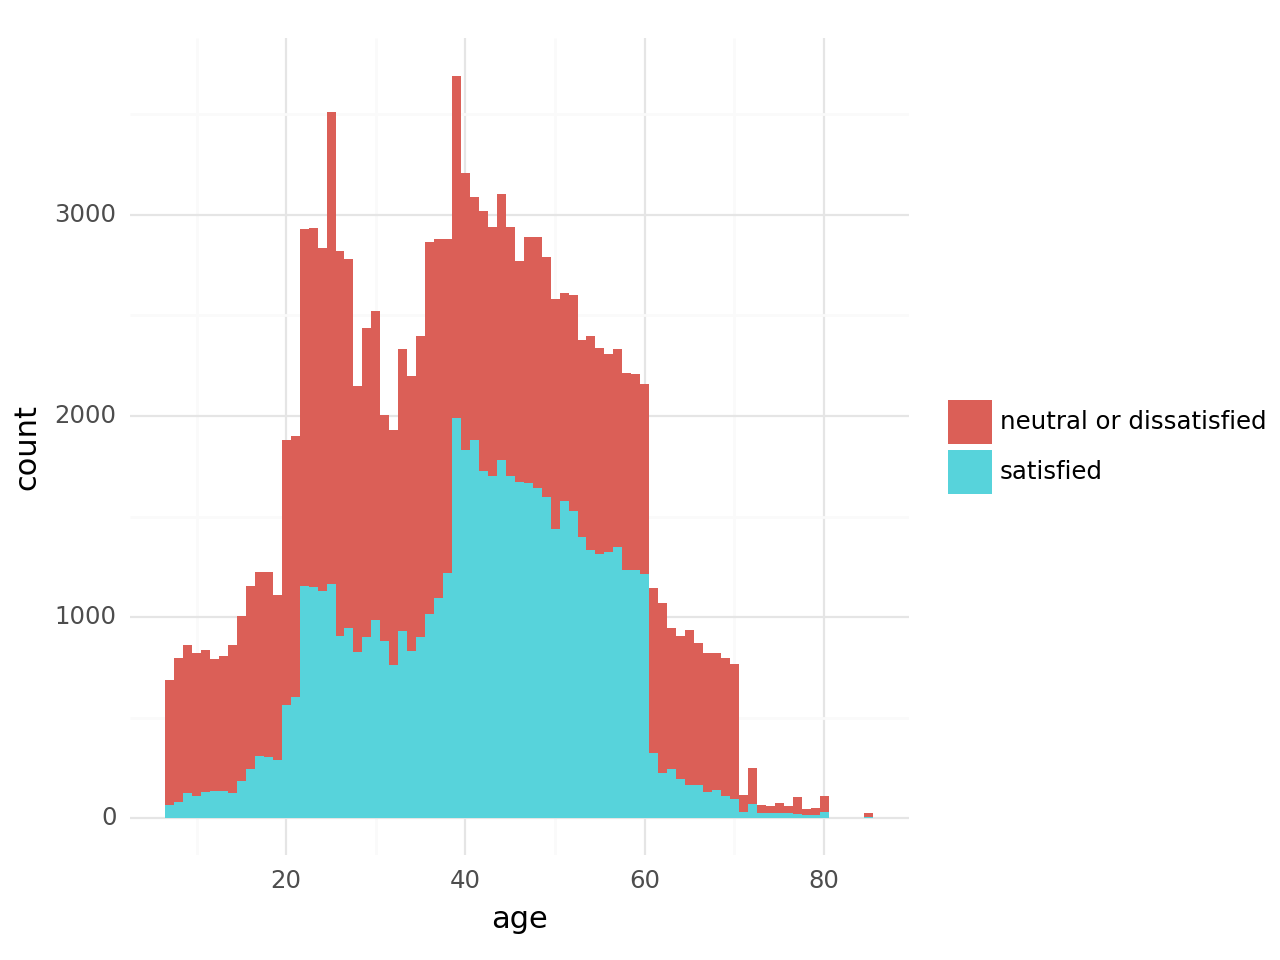

In [236]:
g=(
    ggplot(data=df)
    +geom_histogram(
        aes(x='age', fill='satisfaction'),
        binwidth=1,
    )
    +theme_minimal()
    +theme(legend_title=element_blank()) 
)
print(g)

Entre 20 e 25 anos e entre 40 a 60 anos, temos maior frequência de clientes satisfeitos. Uma hipótese é que esse é o grupo que mais viaja a negócios devido ao momento da carreira. Como vimos acima, a maior frequência de clientes satisfeitos ocorre com aqueles que viajam a negócios e na classe executiva.

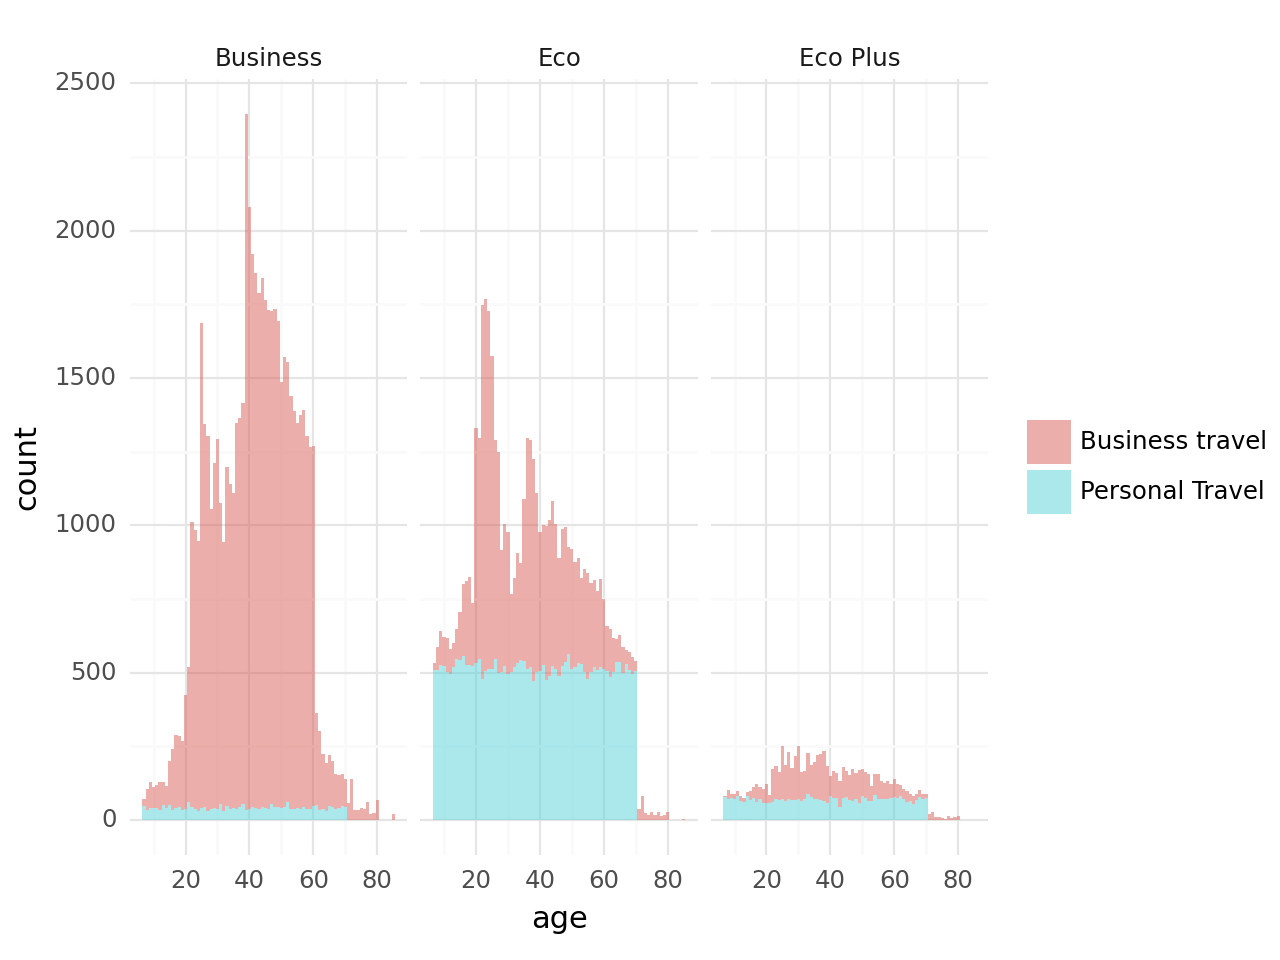

In [237]:
g=(
    ggplot(data=df, mapping=aes(x='age', fill='type_of_travel'))
    +geom_histogram(binwidth=1, alpha=.5)
    +theme_minimal()
    +theme(legend_title=element_blank())
    +facet_grid('.~class') 
)
print(g)

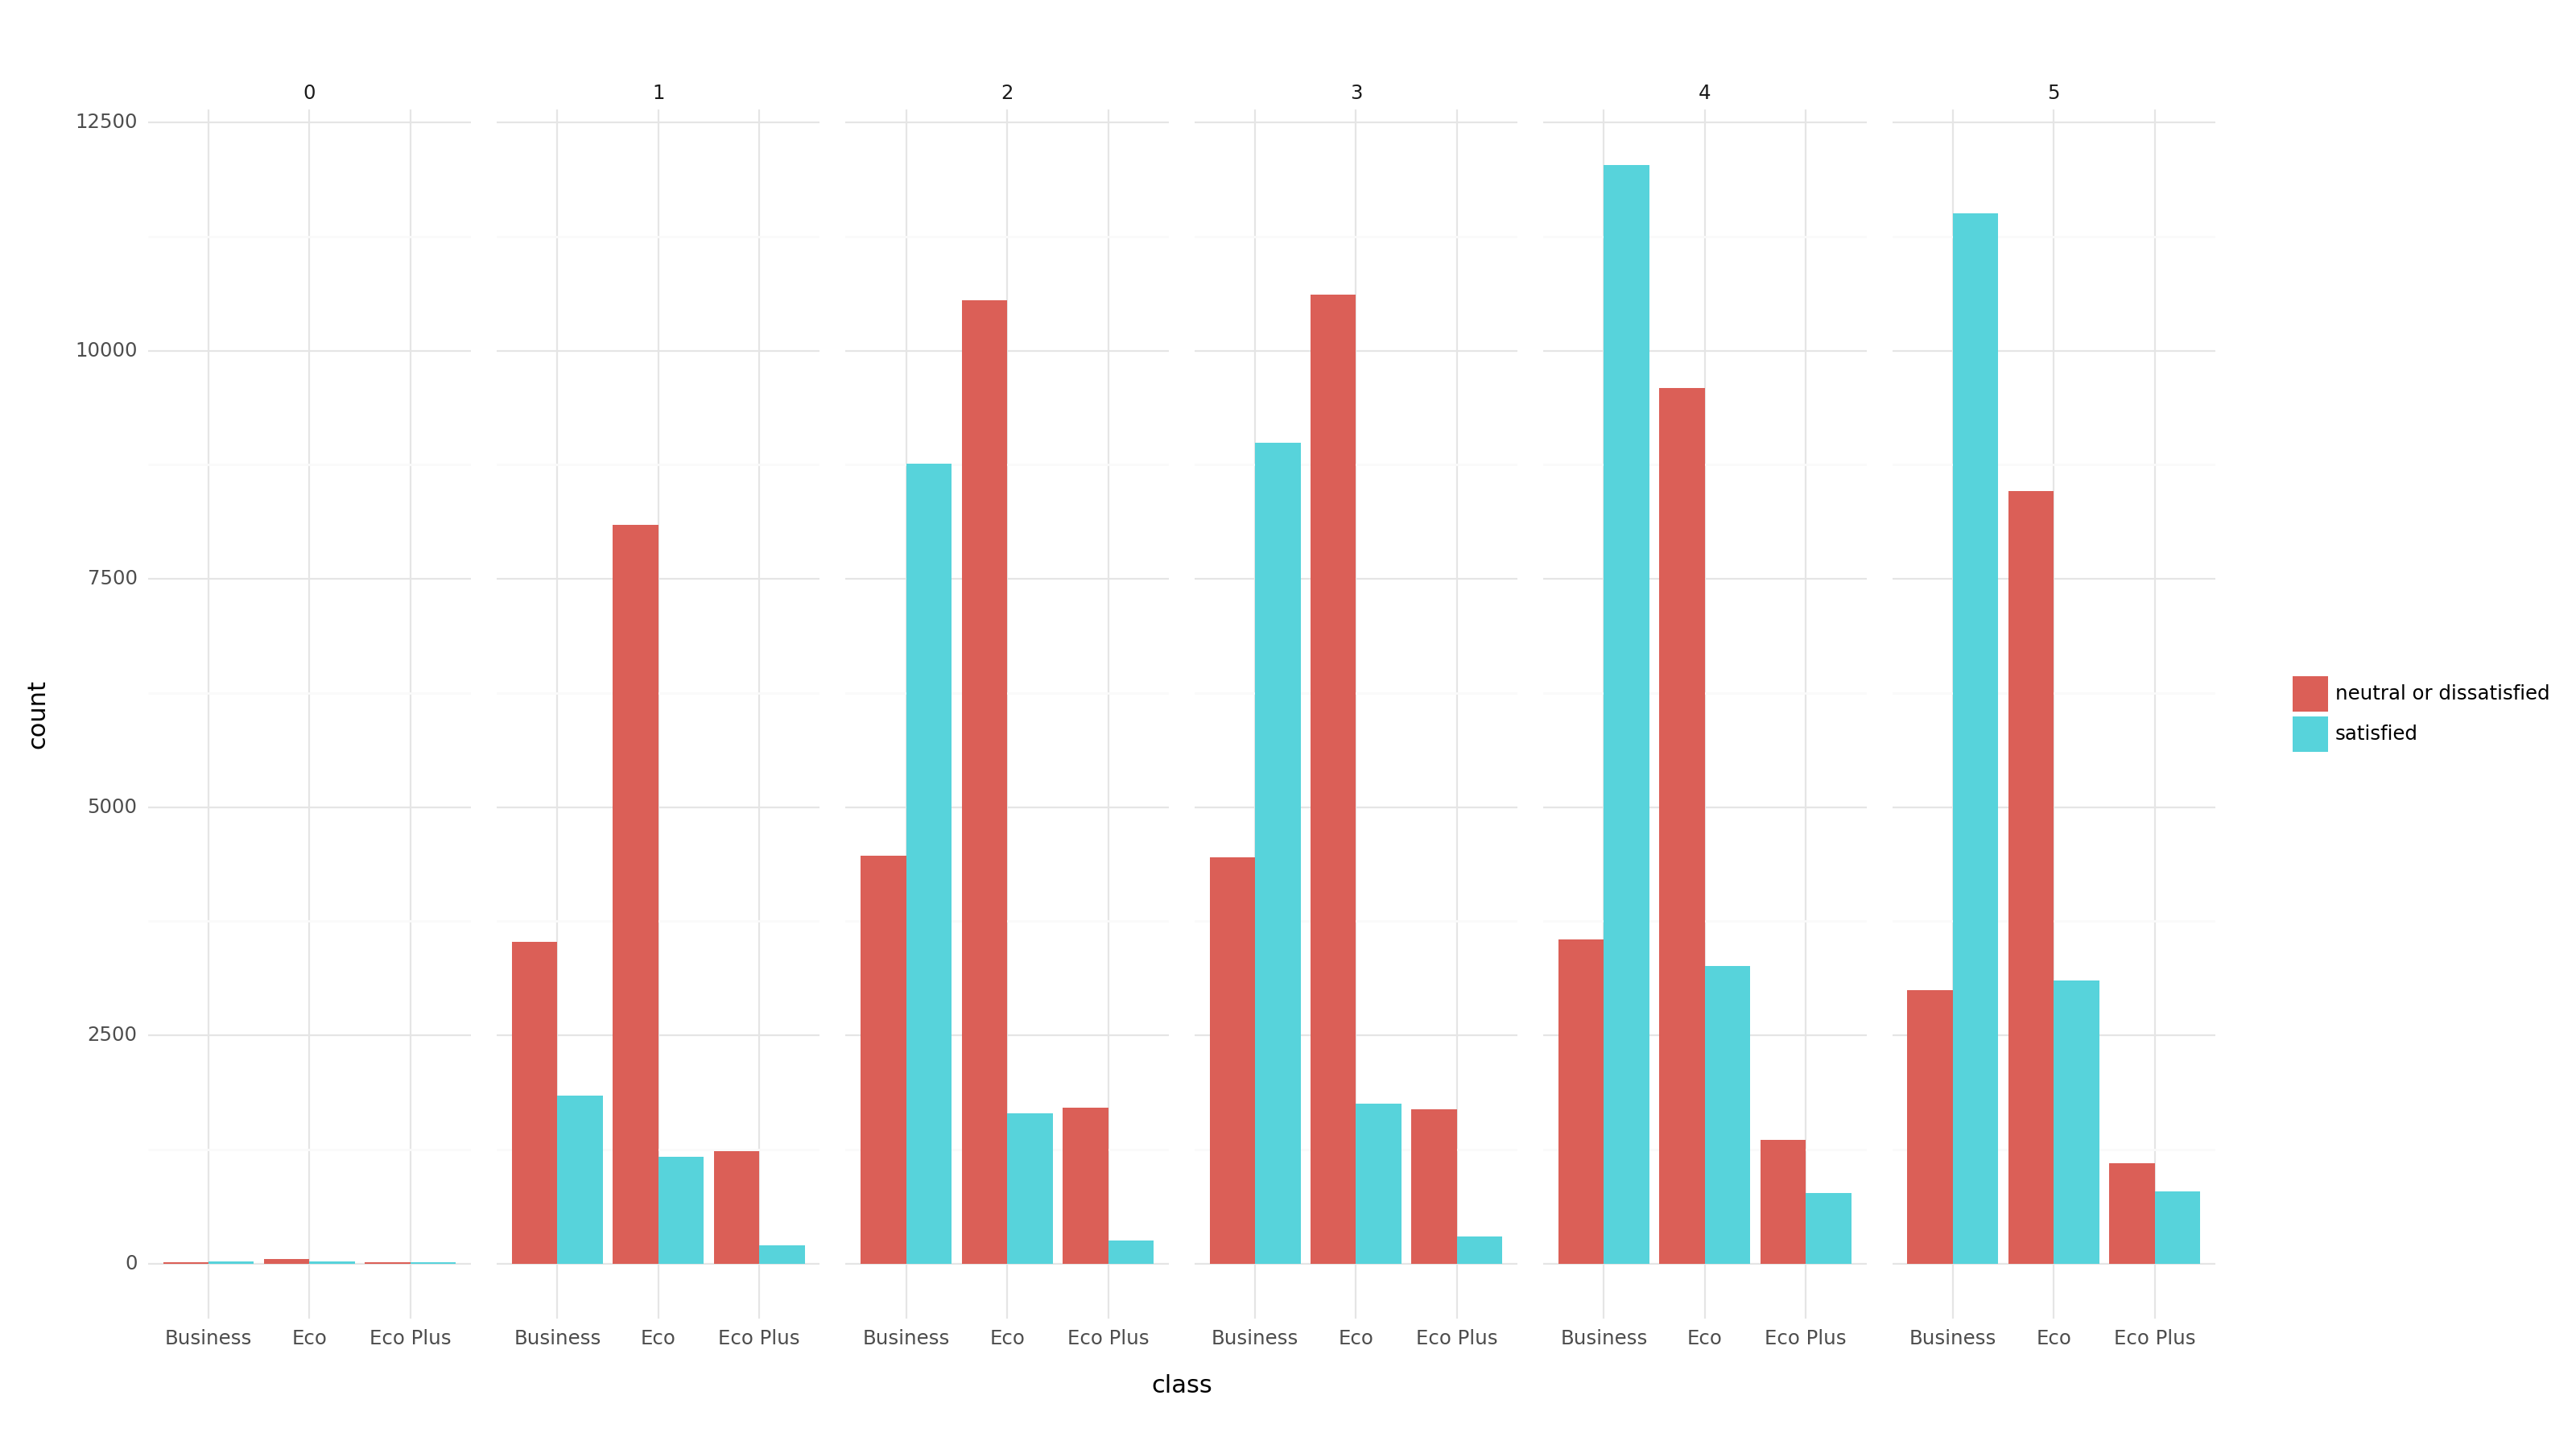

In [248]:
g=(
    ggplot(data=df)
    +geom_col(
        aes(
            x='class',
            fill='satisfaction'
        ),
        stat='count',
        position='dodge'
    )
    +facet_grid('.~food_and_drink')
    +theme_minimal()
    +theme(legend_title=element_blank(), figure_size=(16,9))
)
print(g)

A maior satisfação com a comida se mostra nos passageiros que viajam de classe executiva.

In [42]:
# df['gender'] = np.where(df['gender'] == 'Male', 0, 1)
# df['satisfaction'] = np.where(df['satisfaction'] == 'satisfied', 0, 1)
# df['type_of_travel'] = np.where(df['type_of_travel'] == 'Business travel', 0, 1)
# df['customer_type'] = np.where(df['customer_type'] == 'Loyal Customer', 0, 1)

df.select_dtypes("object")

,gender,customer_type,type_of_travel,class,satisfaction
0,Female,Loyal Customer,Business travel,Eco,satisfied
1,Female,Loyal Customer,Business travel,Business,satisfied
2,Male,disloyal Customer,Business travel,Eco,neutral or dissatisfied
3,Male,Loyal Customer,Business travel,Business,satisfied
4,Female,Loyal Customer,Business travel,Eco,satisfied
...,...,...,...,...,...
103899,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied
103900,Male,Loyal Customer,Business travel,Business,satisfied
103901,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
103902,Female,disloyal Customer,Business travel,Eco,neutral or dissatisfied


In [285]:
# Unique values
pp = PrettyPrinter(indent=4)
pp.pprint({column: sorted(list(df[column].unique())) for column in df.select_dtypes('int64').drop(['flight_distance', 'departure_delay_in_minutes', 'age', 'id'], axis=1).columns})

{   'baggage_handling': [1, 2, 3, 4, 5],
    'check_in_service': [0, 1, 2, 3, 4, 5],
    'cleanliness': [0, 1, 2, 3, 4, 5],
    'departure_arrival_time_convenient': [0, 1, 2, 3, 4, 5],
    'ease_of_online_booking': [0, 1, 2, 3, 4, 5],
    'food_and_drink': [0, 1, 2, 3, 4, 5],
    'gate_location': [0, 1, 2, 3, 4, 5],
    'inflight_entertainment': [0, 1, 2, 3, 4, 5],
    'inflight_service': [0, 1, 2, 3, 4, 5],
    'inflight_wifi_service': [0, 1, 2, 3, 4, 5],
    'leg_room_service': [0, 1, 2, 3, 4, 5],
    'on_board_service': [0, 1, 2, 3, 4, 5],
    'online_boarding': [0, 1, 2, 3, 4, 5],
    'seat_comfort': [0, 1, 2, 3, 4, 5]}


In [394]:
label_encoder = LabelEncoder()

In [395]:
type_of_class = df['class']

In [396]:
label_encoder.fit(type_of_class)

LabelEncoder()

In [397]:
df['class'] = label_encoder.transform(type_of_class)

In [398]:
df.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,on_board_service,leg_room_service,baggage_handling,check_in_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,19556,1,0,52,0,1,160,5,4,3,...,5,5,5,5,2,5,5,50,44.0,0
1,90035,1,0,36,0,0,2863,1,1,3,...,4,4,4,4,3,4,5,0,0.0,0
2,12360,0,1,20,0,1,192,2,0,2,...,2,4,1,3,2,2,2,0,0.0,1
3,77959,0,0,44,0,0,3377,0,0,0,...,1,1,1,1,3,1,4,0,6.0,0
4,36875,1,0,49,0,1,1182,2,3,4,...,2,2,2,2,4,2,4,0,20.0,0


In [399]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   gender                             129880 non-null  int64  
 2   customer_type                      129880 non-null  int64  
 3   age                                129880 non-null  int64  
 4   type_of_travel                     129880 non-null  int64  
 5   class                              129880 non-null  int64  
 6   flight_distance                    129880 non-null  int64  
 7   inflight_wifi_service              129880 non-null  int64  
 8   departure_arrival_time_convenient  129880 non-null  int64  
 9   ease_of_online_booking             129880 non-null  int64  
 10  gate_location                      129880 non-null  int64  
 11  food_and_drink                     1298

In [403]:
df['arrival_delay_in_minutes'] = df['arrival_delay_in_minutes'].replace({np.nan: 0.0}).astype(int)

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype
---  ------                             --------------   -----
 0   id                                 129880 non-null  int64
 1   gender                             129880 non-null  int64
 2   customer_type                      129880 non-null  int64
 3   age                                129880 non-null  int64
 4   type_of_travel                     129880 non-null  int64
 5   class                              129880 non-null  int64
 6   flight_distance                    129880 non-null  int64
 7   inflight_wifi_service              129880 non-null  int64
 8   departure_arrival_time_convenient  129880 non-null  int64
 9   ease_of_online_booking             129880 non-null  int64
 10  gate_location                      129880 non-null  int64
 11  food_and_drink                     129880 non-null  int64
 12  on